In [141]:
# Import libraries

import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')


In [142]:
# Load messages dataset

messages = pd.read_csv("../data/disaster_messages.csv")
messages.head(10)


,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct
5,14,Information about the National Palace-,Informtion au nivaux palais nationl,direct
6,15,Storm at sacred heart of jesus,Cyclone Coeur sacr de jesus,direct
7,16,"Please, we need tents and water. We are in Sil...",Tanpri nou bezwen tant avek dlo nou zon silo m...,direct
8,17,"I would like to receive the messages, thank you",Mwen ta renmen jouin messag yo. Merci,direct
9,18,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct


In [143]:
# All unique values in genre column

messages.genre.unique()


array(['direct', 'social', 'news'], dtype=object)

In [144]:
# A look at a sentence from the message column

messages.message[0]


'Weather update - a cold front from Cuba that could pass over Haiti'

In [145]:
# Load categories dataset

categories = pd.read_csv("../data/disaster_categories.csv")
categories.head(10)


,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...
5,14,related-0;request-0;offer-0;aid_related-0;medi...
6,15,related-1;request-0;offer-0;aid_related-0;medi...
7,16,related-1;request-1;offer-0;aid_related-1;medi...
8,17,related-0;request-0;offer-0;aid_related-0;medi...
9,18,related-1;request-1;offer-0;aid_related-1;medi...


In [146]:
# A look at the value type in categories column

categories.categories[0]


'related-1;request-0;offer-0;aid_related-0;medical_help-0;medical_products-0;search_and_rescue-0;security-0;military-0;child_alone-0;water-0;food-0;shelter-0;clothing-0;money-0;missing_people-0;refugees-0;death-0;other_aid-0;infrastructure_related-0;transport-0;buildings-0;electricity-0;tools-0;hospitals-0;shops-0;aid_centers-0;other_infrastructure-0;weather_related-0;floods-0;storm-0;fire-0;earthquake-0;cold-0;other_weather-0;direct_report-0'

In [148]:
df = messages.merge(categories,on='id')

In [149]:
# Split the values in the categories column and expand it into multiple columns

categories = df['categories'].str.split(";", expand=True)


In [150]:
categories.head(5)


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [114]:
# Rename the columns with the values from the first row
row1 = categories.iloc[0]

# Keep everything except the number at the end
column_names = row1.apply(lambda x: x[:-2]).tolist()

# Rename columns in the dataframe
categories.columns = column_names


In [115]:
categories.head(5)


,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [117]:
def load_data(messages_filepath, categories_filepath):

    messages = pd.read_csv(messages_filepath)
    categories = pd.read_csv(categories_filepath)

    df = messages.merge(categories, on='id')


    return df

In [118]:
# Loop through all the column values and replace with the last number it holds

for col in categories:
    categories[col] = categories[col].str[-1]

    # Convert the values to astype(int)
    categories[col] = categories[col].astype(int)


In [119]:
categories.dtypes.head(10)


related              int64
request              int64
offer                int64
aid_related          int64
medical_help         int64
medical_products     int64
search_and_rescue    int64
security             int64
military             int64
child_alone          int64
dtype: object

In [120]:
categories.head(8)


,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [121]:
# Drop the categories column in the dataframe

df = df.drop('categories', axis=1)


In [122]:
# Concat df and categories dataframes

df = pd.concat([df, categories], axis=1)


In [123]:
df.columns[4:]

Index(['related', 'request', 'offer', 'aid_related', 'medical_help',
       'medical_products', 'search_and_rescue', 'security', 'military',
       'child_alone', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [130]:
# Function to check if any  columns have more than two values

def all_unique(df):

    tot_values = []
    names = []

    columns = df.columns[4:].to_list()

    for col in columns:
        names.append(col)
        tot_values.append(list(df[col].unique()))
        data = dict(zip(names, tot_values))
    for item, values in data.items():
        if len(values) > 2:
        
                print(item)


all_unique(df)


related


In [98]:
df['related'].unique()

array([1, 0, 2])

In [133]:
df['related'] = df['related'].apply(lambda x: 1 if x==2 else x)

In [134]:
df['related'].unique()

array([1, 0])

In [135]:
df.nunique()[4:]

related                   2
request                   2
offer                     2
aid_related               2
medical_help              2
medical_products          2
search_and_rescue         2
security                  2
military                  2
child_alone               1
water                     2
food                      2
shelter                   2
clothing                  2
money                     2
missing_people            2
refugees                  2
death                     2
other_aid                 2
infrastructure_related    2
transport                 2
buildings                 2
electricity               2
tools                     2
hospitals                 2
shops                     2
aid_centers               2
other_infrastructure      2
weather_related           2
floods                    2
storm                     2
fire                      2
earthquake                2
cold                      2
other_weather             2
direct_report       

In [138]:
# Looks child_alone column has only one value

df['child_alone'].value_counts()

0    26386
Name: child_alone, dtype: int64

In [140]:
df = df.drop('child_alone',axis=1)
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26381,30261,The training demonstrated how to enhance micro...,NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26382,30262,A suitable candidate has been selected and OCH...,NaN,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26383,30263,"Proshika, operating in Cox's Bazar municipalit...",NaN,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26384,30264,"Some 2,000 women protesting against the conduc...",NaN,news,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.head(5)

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Check for duplicates

df.duplicated().sum()


170

In [23]:
# Drop duplicates in dataframe

df.drop_duplicates(inplace=True)


In [24]:
# Verify

df.duplicated().sum()


0

Graphs

In [27]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'Categories')

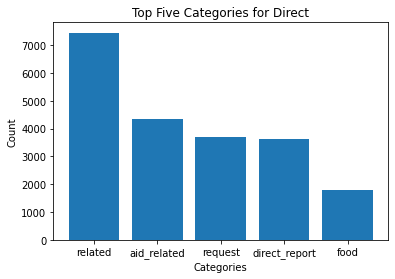

In [120]:
# Graph 1 - Direct
top_direct_cat=df[df['genre'] == 'direct'].iloc[:,4:].sum().sort_values(ascending=False).head(5)
top_direct_cat_names = list(top_direct_cat.index)

plt.bar(top_direct_cat_names,top_direct_cat)
plt.title('Top Five Categories for Direct')
plt.ylabel('Count')
plt.xlabel('Categories')


Text(0.5, 0, 'Categories')

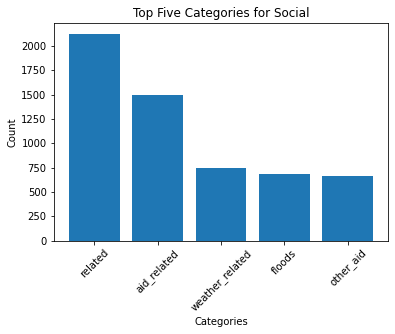

In [124]:
# Graph 2 - Social
top_social_cat=df[df['genre'] == 'social'].iloc[:,4:].sum().sort_values(ascending=False).head(5)
top_social_cat_names = list(top_direct_cat.index)

plt.bar(top_social_cat_names,top_social_cat)
plt.title('Top Five Categories for Social')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Categories')

Text(0.5, 0, 'Categories')

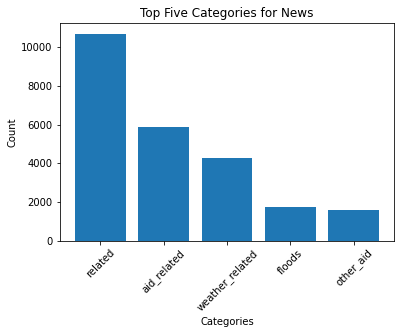

In [125]:
# Graph 3 - News
top_news_cat=df[df['genre'] == 'news'].iloc[:,4:].sum().sort_values(ascending=False).head(5)
top_news_cat_names = list(top_direct_cat.index)

plt.bar(top_news_cat_names,top_news_cat)
plt.title('Top Five Categories for News')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Categories')

In [138]:
# Load the data into a database

from sqlalchemy import create_engine, text

engine = create_engine('sqlite:///DisasterResponse.db', echo=False)
df.to_sql('Disaster_data', engine, if_exists='replace', index=False)


26216

In [139]:
# Check that data was saved correctly

new_data = pd.read_sql_query(
    text('SELECT * FROM Disaster_data'), con=engine.connect())
print(new_data.head())


   id                                            message  \
0   2  Weather update - a cold front from Cuba that c...   
1   7            Is the Hurricane over or is it not over   
2   8                    Looking for someone but no name   
3   9  UN reports Leogane 80-90 destroyed. Only Hospi...   
4  12  says: west side of Haiti, rest of the country ...   

                                            original   genre  related  \
0  Un front froid se retrouve sur Cuba ce matin. ...  direct        1   
1                 Cyclone nan fini osinon li pa fini  direct        1   
2  Patnm, di Maryani relem pou li banm nouvel li ...  direct        1   
3  UN reports Leogane 80-90 destroyed. Only Hospi...  direct        1   
4  facade ouest d Haiti et le reste du pays aujou...  direct        1   

   request  offer  aid_related  medical_help  medical_products  ...  \
0        0      0            0             0                 0  ...   
1        0      0            1             0              